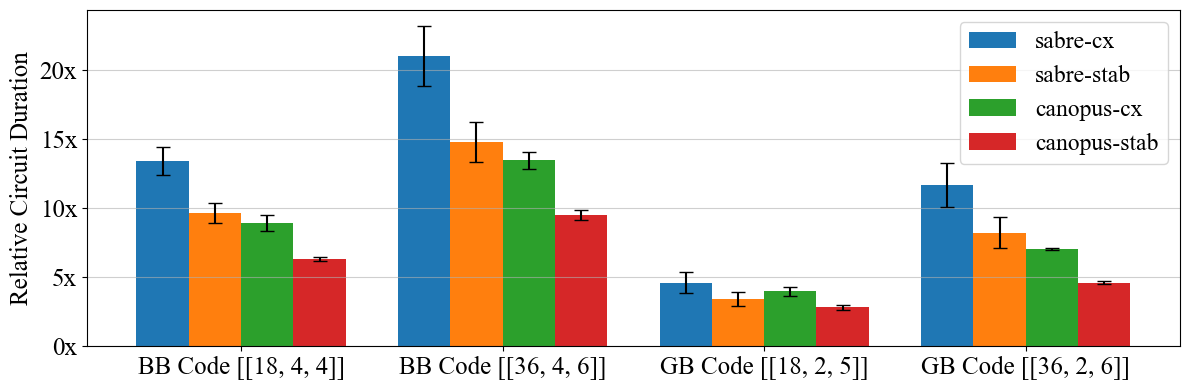

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'

df = pd.read_excel("bench_qldpc.xlsx", sheet_name="square")

methods = ["sabre-cx", "sabre-stab", "canopus-cx", "canopus-stab"]
colors = {
    "sabre-cx": "tab:blue",
    "sabre-stab": "tab:orange",
    "canopus-cx": "tab:green",
    "canopus-stab": "tab:red",
}

rename_dict = {
    "BBCode1": "BB Code [[18, 4, 4]]",
    "BBCode2": "BB Code [[36, 4, 6]]",
    "GBCode1": "GB Code [[18, 2, 5]]",
    "GBCode2": "GB Code [[30, 2, 5]]",
    "GBCode3": "GB Code [[36, 2, 6]]",
}

selected_codes = ["BBCode1", "BBCode2", "GBCode1", "GBCode3"]
df = df[df["code name"].isin(selected_codes)]
grouped = df.groupby("code name").agg(["mean", "std"])

fig, ax = plt.subplots(figsize=(12, 4))

x_labels = [rename_dict.get(name, name) for name in grouped.index]
x = np.arange(len(x_labels))
width = 0.2

for i, method in enumerate(methods):
    means = grouped[("duration(" + method + ")", "mean")] / grouped[("duration(qc)", "mean")]
    stds = grouped[("duration(" + method + ")", "std")] / grouped[("duration(qc)", "mean")]
    ax.bar(x + i * width, means, width, yerr=stds, label=method, color=colors[method], capsize=5)

def add_x_suffix(y, _):
    return f"{int(y)}x"

ax.yaxis.set_major_formatter(FuncFormatter(add_x_suffix))

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_labels, rotation=0)
ax.set_ylabel("Relative Circuit Duration", fontsize=18)
ax.legend(fontsize=17)
ax.grid(axis="y", linestyle="-", alpha=0.6)
plt.tick_params(axis='both', which='both', labelsize=18)
plt.tight_layout()
plt.savefig("duration_topo_square.pdf", dpi=300)
plt.show()

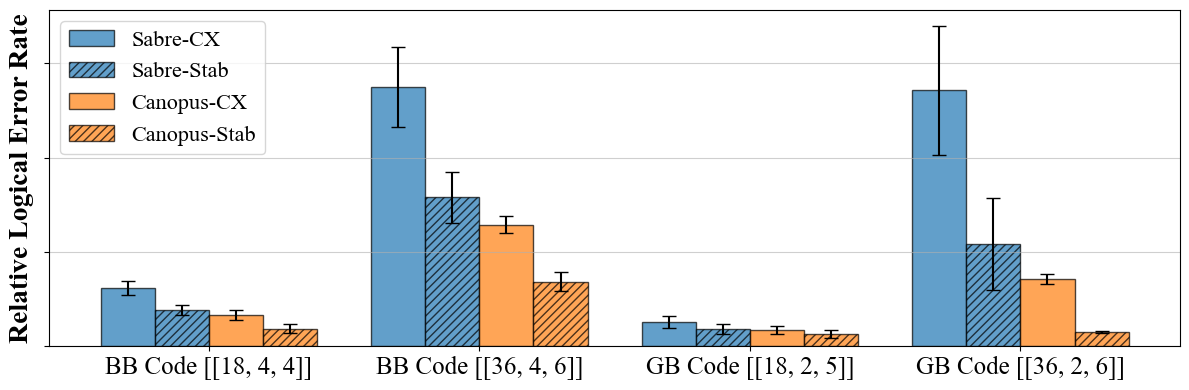

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'

df = pd.read_excel("bench_qldpc.xlsx", sheet_name="square")

methods = ["Sabre-CX", "Sabre-Stab", "Canopus-CX", "Canopus-Stab"]
colors = {
    "Sabre-CX": "tab:blue",
    "Sabre-Stab": "tab:blue",
    "Canopus-CX": "tab:orange",
    "Canopus-Stab": "tab:orange",
}

rename_dict = {
    "BBCode1": "BB Code [[18, 4, 4]]",
    "BBCode2": "BB Code [[36, 4, 6]]",
    "GBCode1": "GB Code [[18, 2, 5]]",
    "GBCode2": "GB Code [[30, 2, 5]]",
    "GBCode3": "GB Code [[36, 2, 6]]",
}

selected_codes = ["BBCode1", "BBCode2", "GBCode1", "GBCode3"]
df = df[df["code name"].isin(selected_codes)]
grouped = df.groupby("code name").agg(["mean", "std"])

fig, ax = plt.subplots(figsize=(12, 4))

x_labels = [rename_dict.get(name, name) for name in grouped.index]
x = np.arange(len(x_labels))
width = 0.2

for i, method in enumerate(methods):
    means = grouped[("LER(" + method.lower() + ")", "mean")] / grouped[("LER(qc)", "mean")]
    stds = grouped[("LER(" + method.lower() + ")", "std")] / grouped[("LER(qc)", "mean")]
    hatch = '////' if 'stab' in method.lower() else ''
    ax.bar(x + i * width, means, width, yerr=stds, label=method, color=colors[method], capsize=5, edgecolor="black", hatch=hatch, alpha=0.7)

def add_x_suffix(y, _):
    return f"{int(y)}x"

ax.yaxis.set_major_formatter(FuncFormatter(add_x_suffix))

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_labels, rotation=0, fontsize=18)
ax.set_ylabel("Relative Logical Error Rate", fontsize=20, fontweight='bold')
ax.set_yticklabels(r"", fontsize=18)
ax.legend(fontsize=16, loc="upper left")
# ax.set_ylim(1e1, 1e3)
# ax.set_yscale("log")
ax.grid(axis="y", linestyle="-", alpha=0.6, which="major")
plt.tick_params(axis='both', which='both', labelsize=18)
plt.tight_layout()
# plt.savefig("../figures/ler_topo_square.pdf", dpi=300)
plt.show()

In [11]:
mean_ler = {}
for i, method in enumerate(methods):
    means = grouped[("LER(" + method.lower() + ")", "mean")] / grouped[("LER(qc)", "mean")]
    mean_ler[method] = means

In [27]:
gmean(mean_ler['Sabre-CX'] / mean_ler['Canopus-CX']) # - mean_ler['Sabre-CX']

2.1823056476747618

In [ ]:
from scipy.stats import gmean

gmean(abs(mean_ler['Canopus-CX'] - mean_ler['Sabre-CX']) / mean_ler['Sabre-CX'])


0.49394869800189684

In [ ]:
gmean(abs(mean_ler['Canopus-Stab'] - mean_ler['Sabre-Stab']) / mean_ler['Sabre-Stab'])


0.5255538208516841

In [ ]:
df['LER']

,code name,duration(qc),duration(sabre-cx),duration(sabre-stab),duration(canopus-cx),duration(canopus-stab),LER(qc),LER(sabre-cx),LER(sabre-stab),LER(canopus-cx),LER(canopus-stab)
0,BBCode1,9,136,98,76,57,0.001200,0.163640,0.101710,0.076198,0.036887
1,BBCode1,9,113,82,86,55,0.001200,0.162438,0.106270,0.092747,0.043717
2,BBCode1,9,120,85,79,58,0.001200,0.157603,0.097967,0.069245,0.063825
3,BBCode1,9,120,86,86,58,0.001200,0.134008,0.077560,0.091133,0.048595
4,BBCode1,9,114,82,75,56,0.001200,0.126505,0.078827,0.064340,0.032930
5,BBCode2,9,204,143,115,89,0.000425,0.265950,0.157575,0.102200,0.067975
6,BBCode2,9,196,138,126,84,0.000425,0.240695,0.134095,0.109783,0.052570
7,BBCode2,9,167,118,122,83,0.000425,0.194550,0.111525,0.117175,0.054000
8,GBCode1,8,42,31,32,22,0.001300,0.056275,0.038965,0.051345,0.026935
9,GBCode1,8,28,21,35,24,0.001300,0.075810,0.059000,0.059210,0.035250


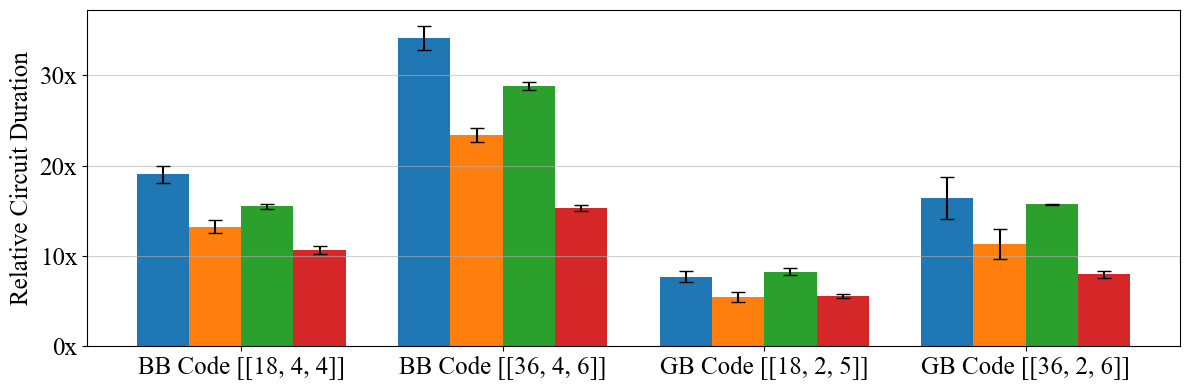

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'

df = pd.read_excel("bench_qldpc.xlsx", sheet_name="hhex")

methods = ["sabre-cx", "sabre-stab", "canopus-cx", "canopus-stab"]
colors = {
    "sabre-cx": "tab:blue",
    "sabre-stab": "tab:orange",
    "canopus-cx": "tab:green",
    "canopus-stab": "tab:red",
}

rename_dict = {
    "BBCode1": "BB Code [[18, 4, 4]]",
    "BBCode2": "BB Code [[36, 4, 6]]",
    "GBCode1": "GB Code [[18, 2, 5]]",
    "GBCode2": "GB Code [[30, 2, 5]]",
    "GBCode3": "GB Code [[36, 2, 6]]",
}

selected_codes = ["BBCode1", "BBCode2", "GBCode1", "GBCode3"]
df = df[df["code name"].isin(selected_codes)]
grouped = df.groupby("code name").agg(["mean", "std"])

fig, ax = plt.subplots(figsize=(12, 4))

x_labels = [rename_dict.get(name, name) for name in grouped.index]
x = np.arange(len(x_labels))
width = 0.2

for i, method in enumerate(methods):
    means = grouped[("duration(" + method + ")", "mean")] / grouped[("duration(qc)", "mean")]
    stds = grouped[("duration(" + method + ")", "std")] / grouped[("duration(qc)", "mean")]
    ax.bar(x + i * width, means, width, yerr=stds, label=method, color=colors[method], capsize=5)

def add_x_suffix(y, _):
    return f"{int(y)}x"

ax.yaxis.set_major_formatter(FuncFormatter(add_x_suffix))

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_labels, rotation=0)
ax.set_ylabel("Relative Circuit Duration", fontsize=18)
# ax.legend(fontsize=12)
ax.grid(axis="y", linestyle="-", alpha=0.6)
plt.tick_params(axis='both', which='both', labelsize=18)
plt.tight_layout()
plt.savefig("duration_topo_hhex.pdf", dpi=300)
plt.show()

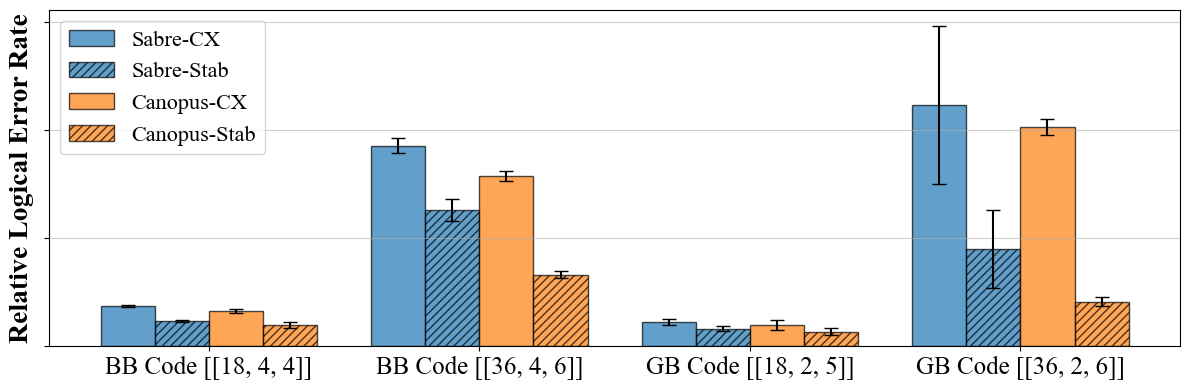

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'

df = pd.read_excel("bench_qldpc.xlsx", sheet_name="hhex")

methods = ["Sabre-CX", "Sabre-Stab", "Canopus-CX", "Canopus-Stab"]
colors = {
    "Sabre-CX": "tab:blue",
    "Sabre-Stab": "tab:blue",
    "Canopus-CX": "tab:orange",
    "Canopus-Stab": "tab:orange",
}

rename_dict = {
    "BBCode1": "BB Code [[18, 4, 4]]",
    "BBCode2": "BB Code [[36, 4, 6]]",
    "GBCode1": "GB Code [[18, 2, 5]]",
    "GBCode2": "GB Code [[30, 2, 5]]",
    "GBCode3": "GB Code [[36, 2, 6]]",
}

selected_codes = ["BBCode1", "BBCode2", "GBCode1", "GBCode3"]
df = df[df["code name"].isin(selected_codes)]
grouped = df.groupby("code name").agg(["mean", "std"])

fig, ax = plt.subplots(figsize=(12, 4))

x_labels = [rename_dict.get(name, name) for name in grouped.index]
x = np.arange(len(x_labels))
width = 0.2

for i, method in enumerate(methods):
    means = grouped[("LER(" + method.lower() + ")", "mean")] / grouped[("LER(qc)", "mean")]
    stds = grouped[("LER(" + method.lower() + ")", "std")] / grouped[("LER(qc)", "mean")]
    hatch = '////' if 'stab' in method.lower() else ''
    ax.bar(x + i * width, means, width, yerr=stds, label=method, color=colors[method], capsize=5, edgecolor="black", hatch=hatch, alpha=0.7)

def add_x_suffix(y, _):
    return f"{int(y)}x"

ax.yaxis.set_major_formatter(FuncFormatter(add_x_suffix))

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(x_labels, rotation=0, fontsize=18)
ax.set_ylabel(r"Relative Logical Error Rate", fontsize=20, fontweight='bold')
ax.set_yticklabels(r"", fontsize=18)
ax.legend(fontsize=16, loc="upper left")
# ax.set_ylim(1e1, 1.7e3)
# ax.set_yscale("log")
ax.grid(axis="y", linestyle="-", alpha=0.6, which="major")
plt.tick_params(axis='both', which='both', labelsize=18)
plt.tight_layout()
# plt.savefig("../figures/ler_topo_hhex.pdf", dpi=300)
plt.show()

In [31]:
mean_ler = {}
for i, method in enumerate(methods):
    means = grouped[("LER(" + method.lower() + ")", "mean")] / grouped[("LER(qc)", "mean")]
    mean_ler[method] = means

In [33]:
gmean(abs(mean_ler['Canopus-CX'] - mean_ler['Sabre-CX']) / mean_ler['Sabre-CX'])

0.11415794499678052

In [32]:
gmean(abs(mean_ler['Canopus-Stab'] - mean_ler['Sabre-Stab']) / mean_ler['Sabre-Stab'])

0.29344897193597164

In [36]:
mean_ler['Canopus-CX']

code name
BBCode1     163.187500
BBCode2     787.176471
GBCode1      99.638462
GBCode3    1015.500000
dtype: float64

In [39]:
mean_ler['Sabre-CX']

code name
BBCode1     186.725000
BBCode2     927.078431
GBCode1     110.715385
GBCode3    1115.000000
dtype: float64